# **PlayGround Series Season 5 Episode 4**

## **Podcast Listening Time Prediction**

### Library Importation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_columns", None)

### Data Loading and Initial Exploration

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

In [3]:
print(f'''The Number of Rows-Columns in The Train Data are {train_data.shape}
The Number of Rows-COlumns in the Test Data are {test_data.shape}''')

The Number of Rows-Columns in The Train Data are (750000, 12)
The Number of Rows-COlumns in the Test Data are (250000, 11)


In [4]:
train_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [6]:
test_data.tail()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive
249999,999999,Brain Boost,Episode 46,78.05,Education,41.72,Friday,Morning,50.77,0.0,Negative


In [7]:
samp.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [8]:
train_data['id'].value_counts()

id
0         1
499993    1
499995    1
499996    1
499997    1
         ..
250001    1
250002    1
250003    1
250004    1
749999    1
Name: count, Length: 750000, dtype: int64

Here Id is a Unique Identifier for each column so its better to make it an index

In [9]:
train_data.set_index('id', inplace = True)
test_data.set_index('id', inplace = True)


In [10]:
train_data.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

## Correlation Plot

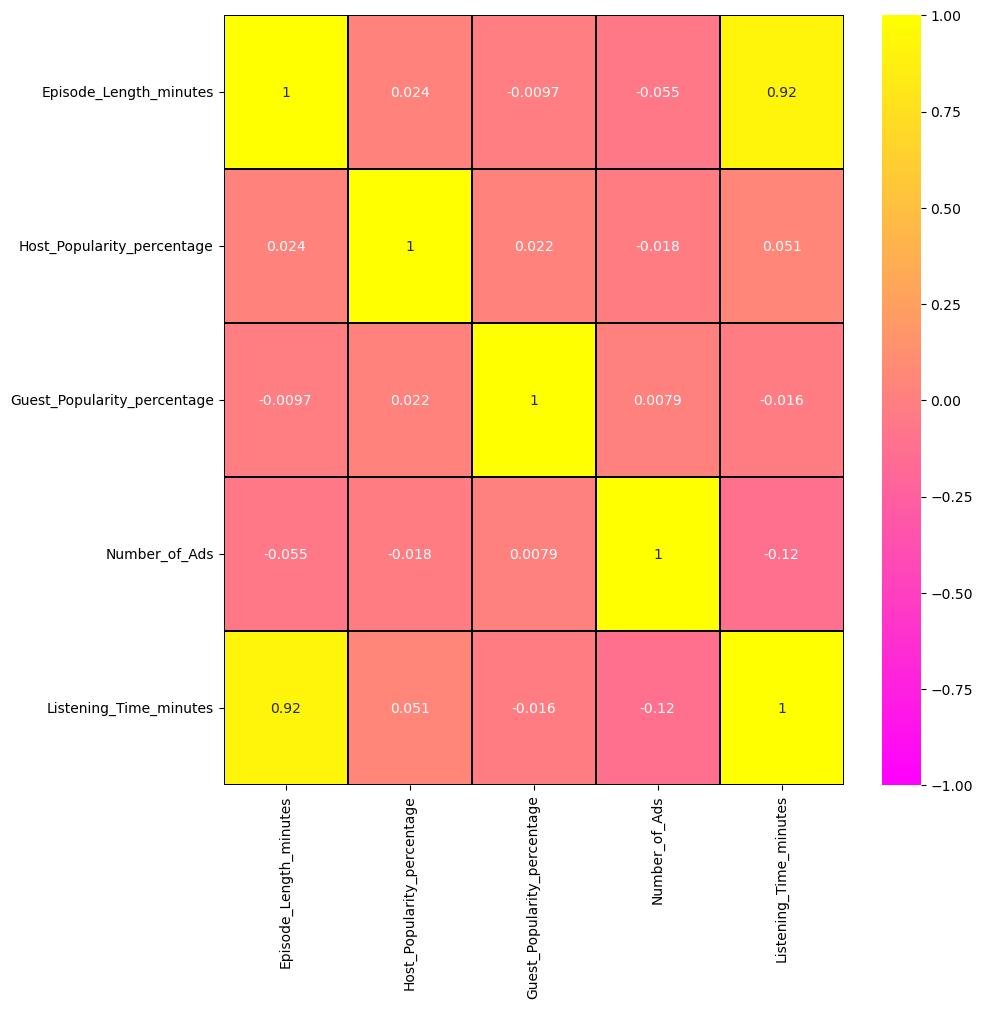

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train_data.corr(numeric_only=True), vmin= -1, vmax = 1, annot=True, linecolor='black',linewidths=0.05, cmap = 'spring')
plt.show()

Inferences :

- Number of ads have high correlation with listening time means when ads increase listening time slightly decrease as well.

- Episode Length increase will lead to increase in episode time

### Exploratory Data Analysis

In [12]:
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage','Listening_Time_minutes']

cat_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time','Number_of_Ads', 'Episode_Sentiment']

### Univariate Analysis

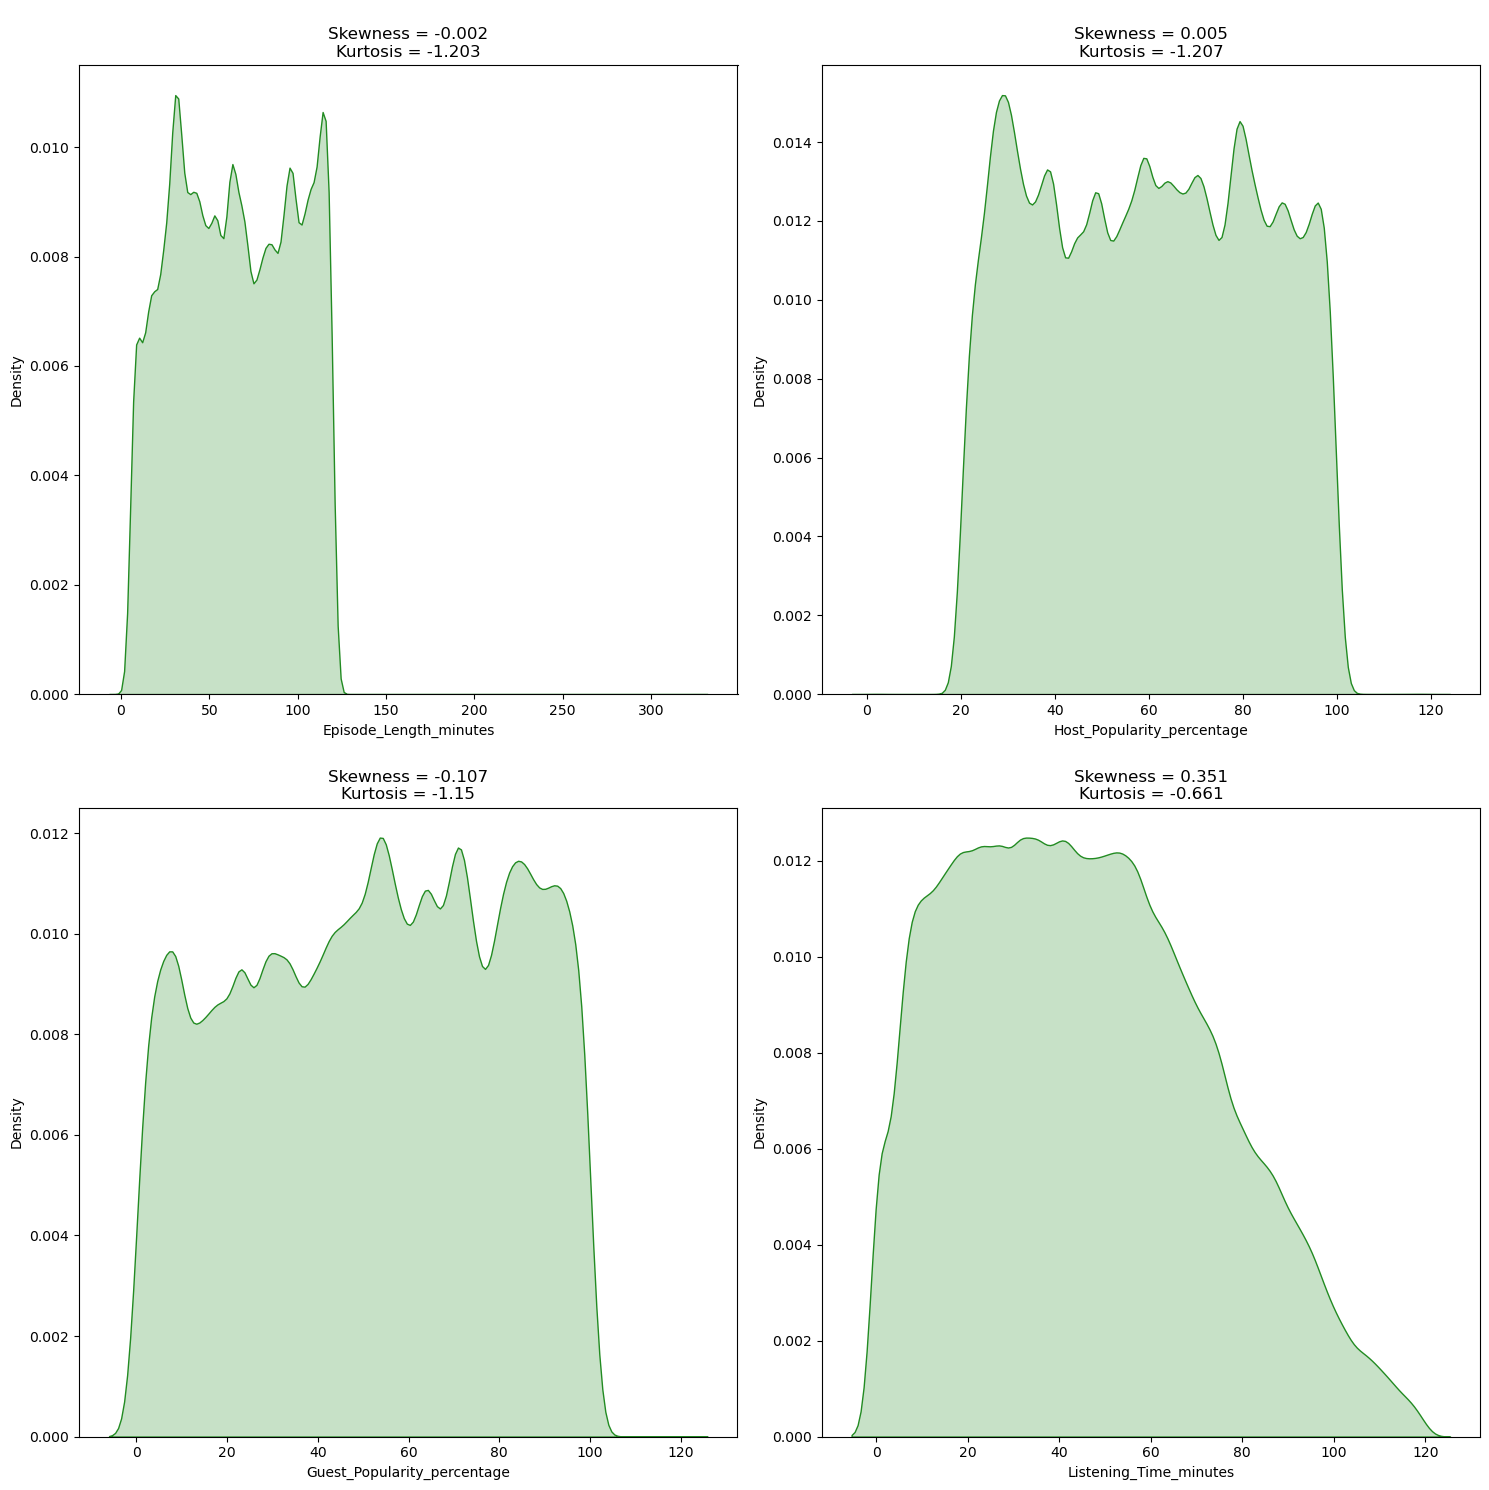

In [44]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'''
Skewness = {round(train_data[i].skew(),3)}
Kurtosis = {round(train_data[i].kurt(),3)}''')
    sns.kdeplot(data = train_data, x = i, color= 'forestgreen', fill = True)
    t = t+1

plt.tight_layout()
plt.show()

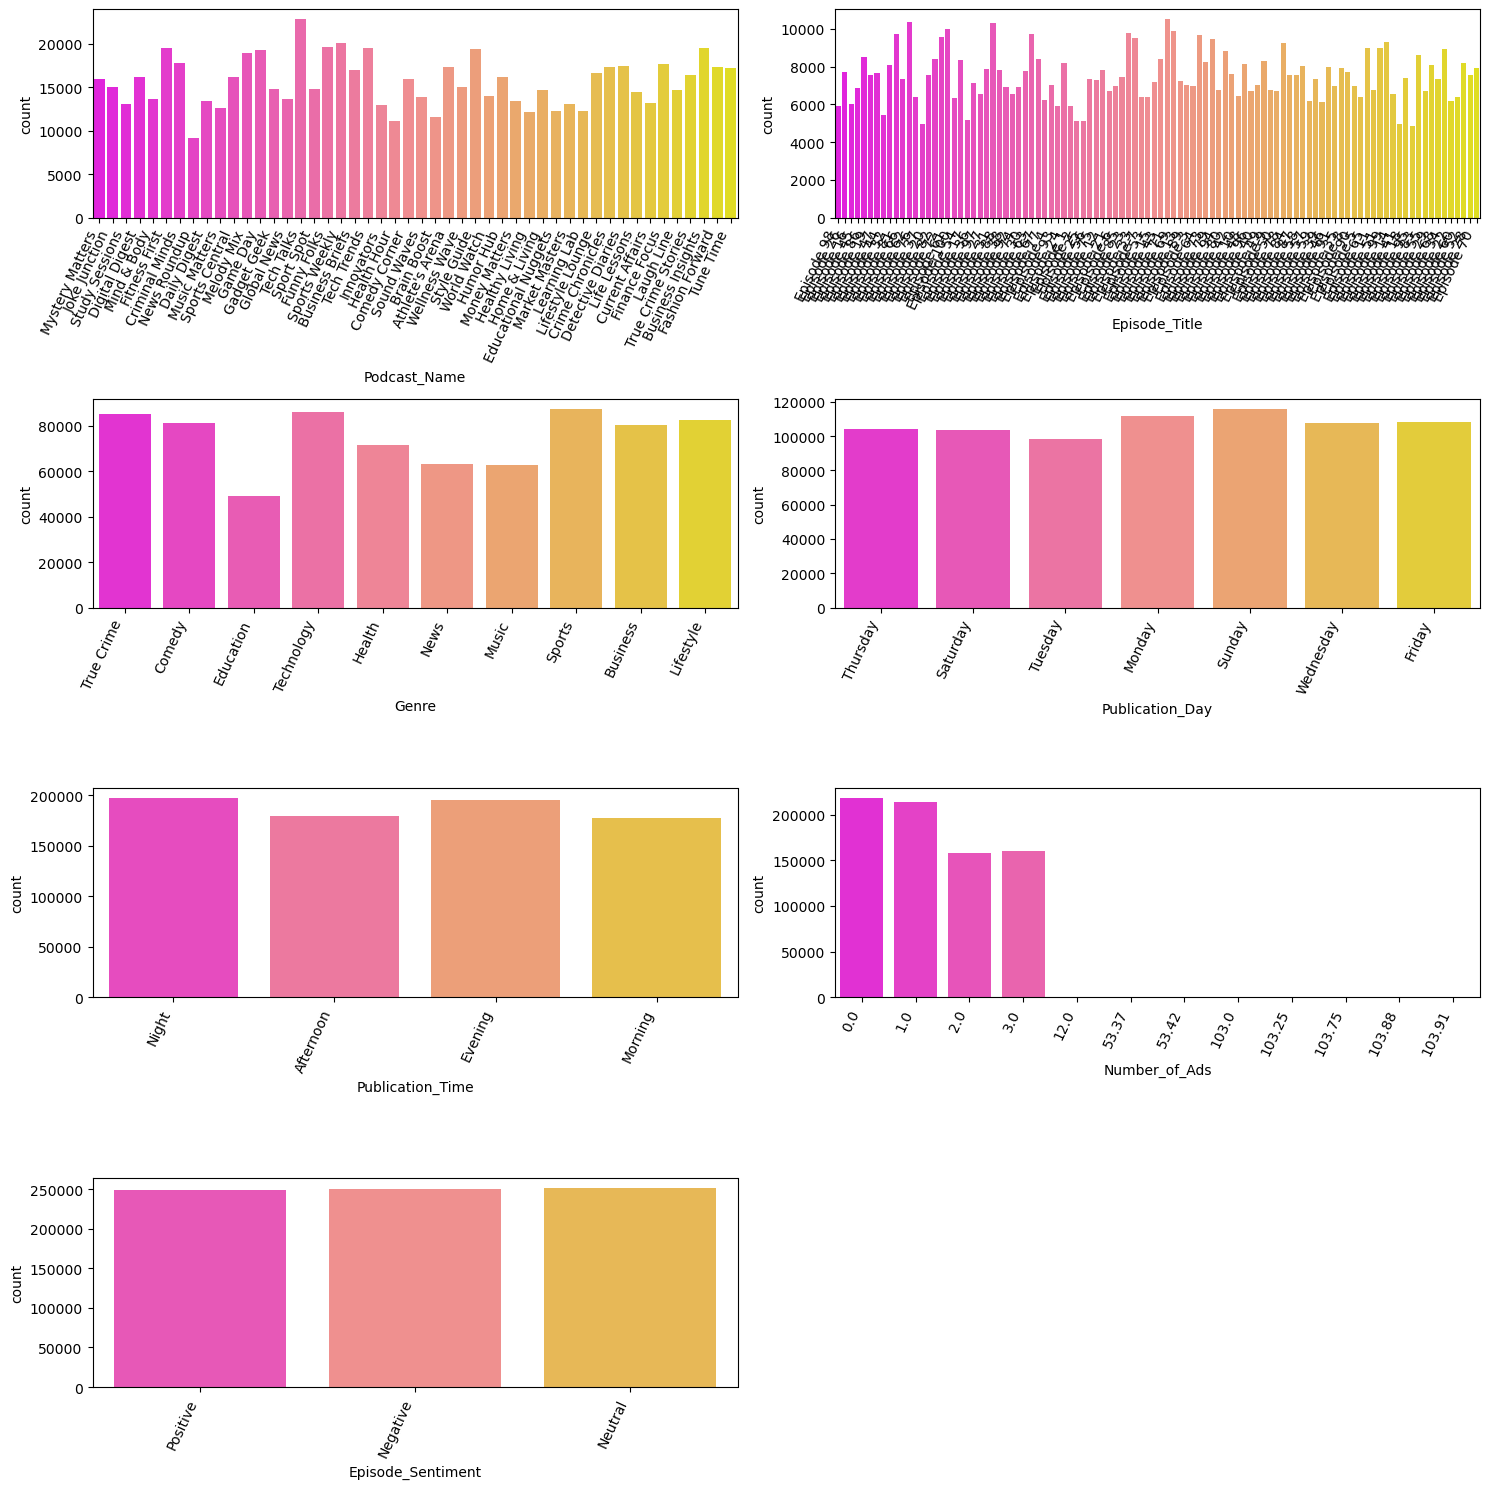

In [45]:
t = 1
plt.figure(figsize = (15,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    plt.xticks(rotation = 65, ha = 'right')
    sns.countplot(data = train_data, x = i, palette= 'spring', fill = True)
    t = t+1

plt.tight_layout()
plt.show()

### Bivariate Analysis

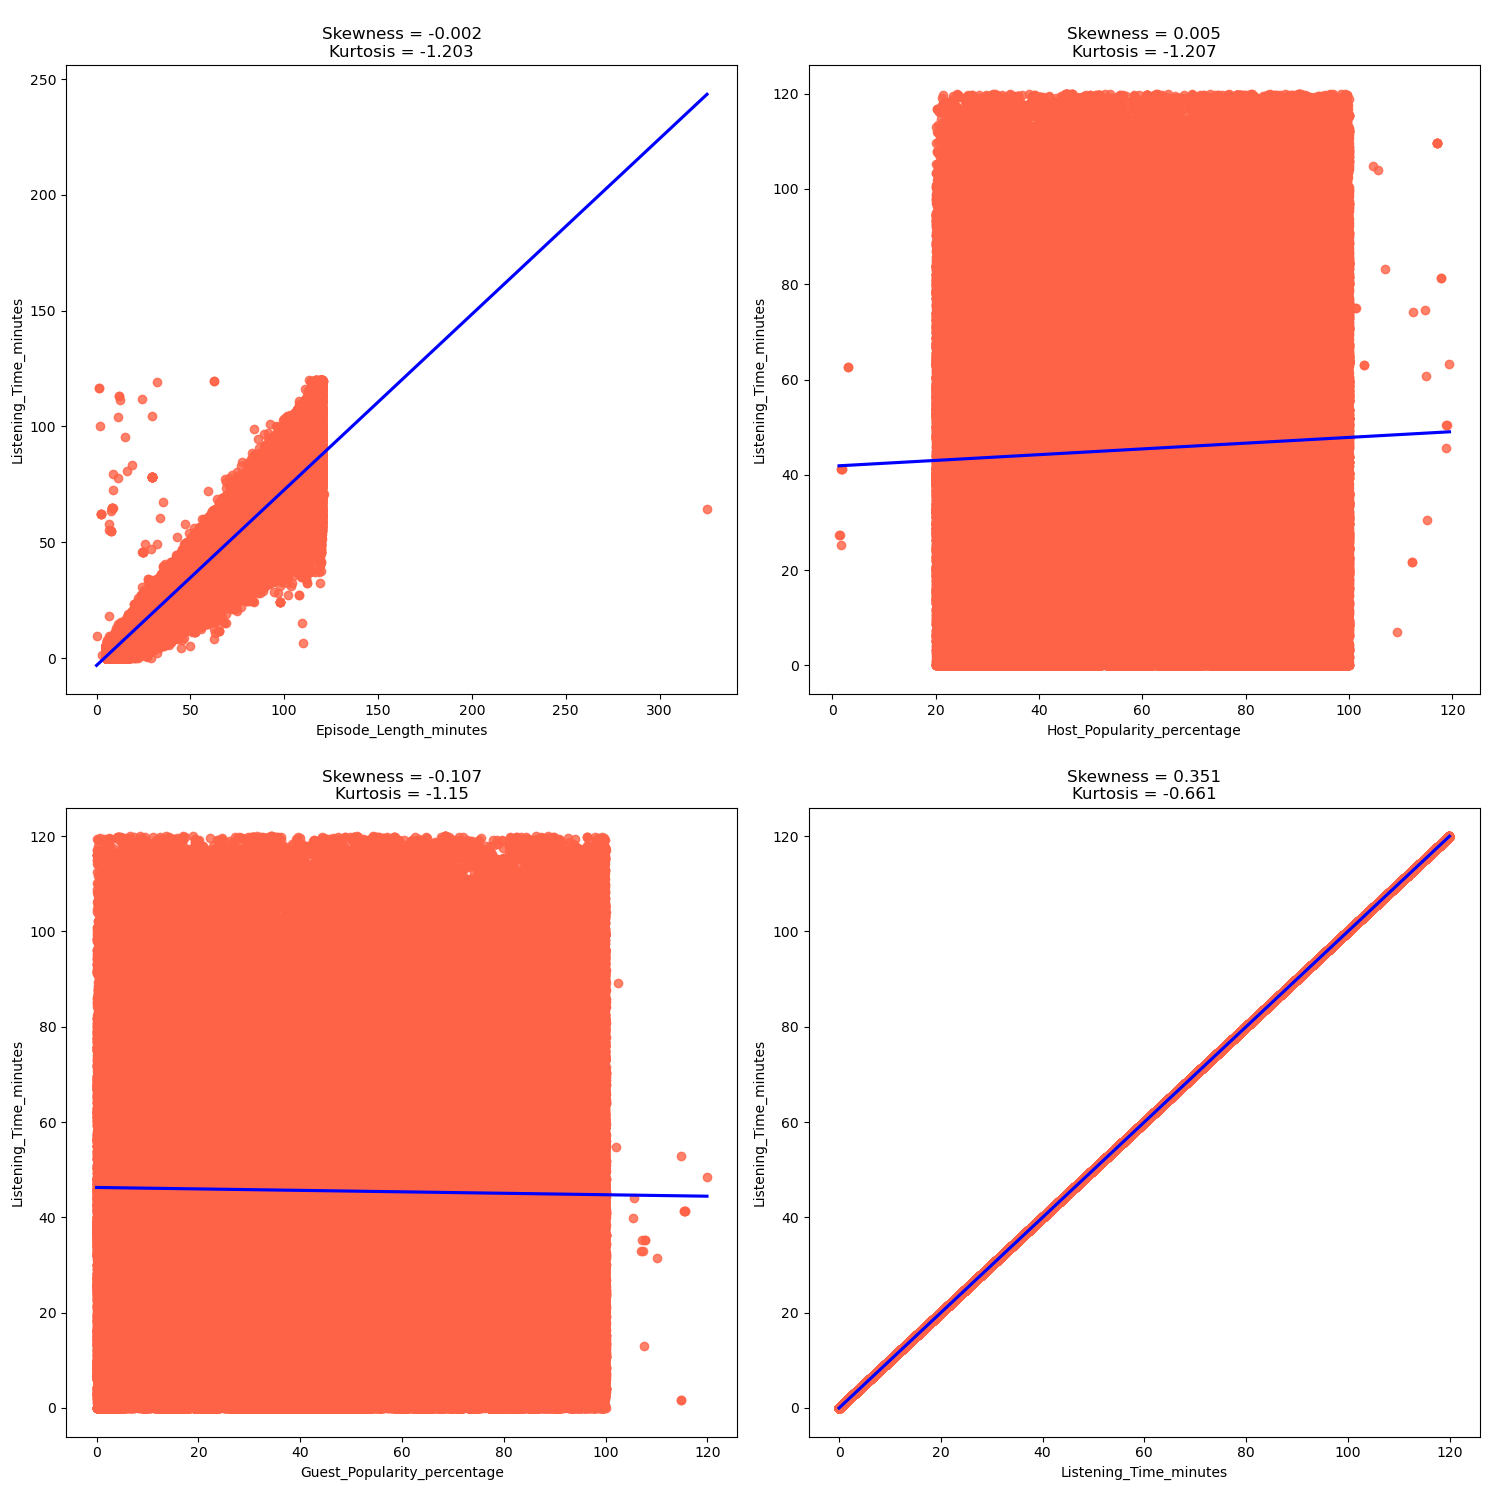

In [46]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'''
Skewness = {round(train_data[i].skew(),3)}
Kurtosis = {round(train_data[i].kurt(),3)}''')
    sns.regplot(data = train_data, x = i, y = 'Listening_Time_minutes', line_kws={"color" : 'Blue'}, color="tomato")
    t = t+1

plt.tight_layout()
plt.show()

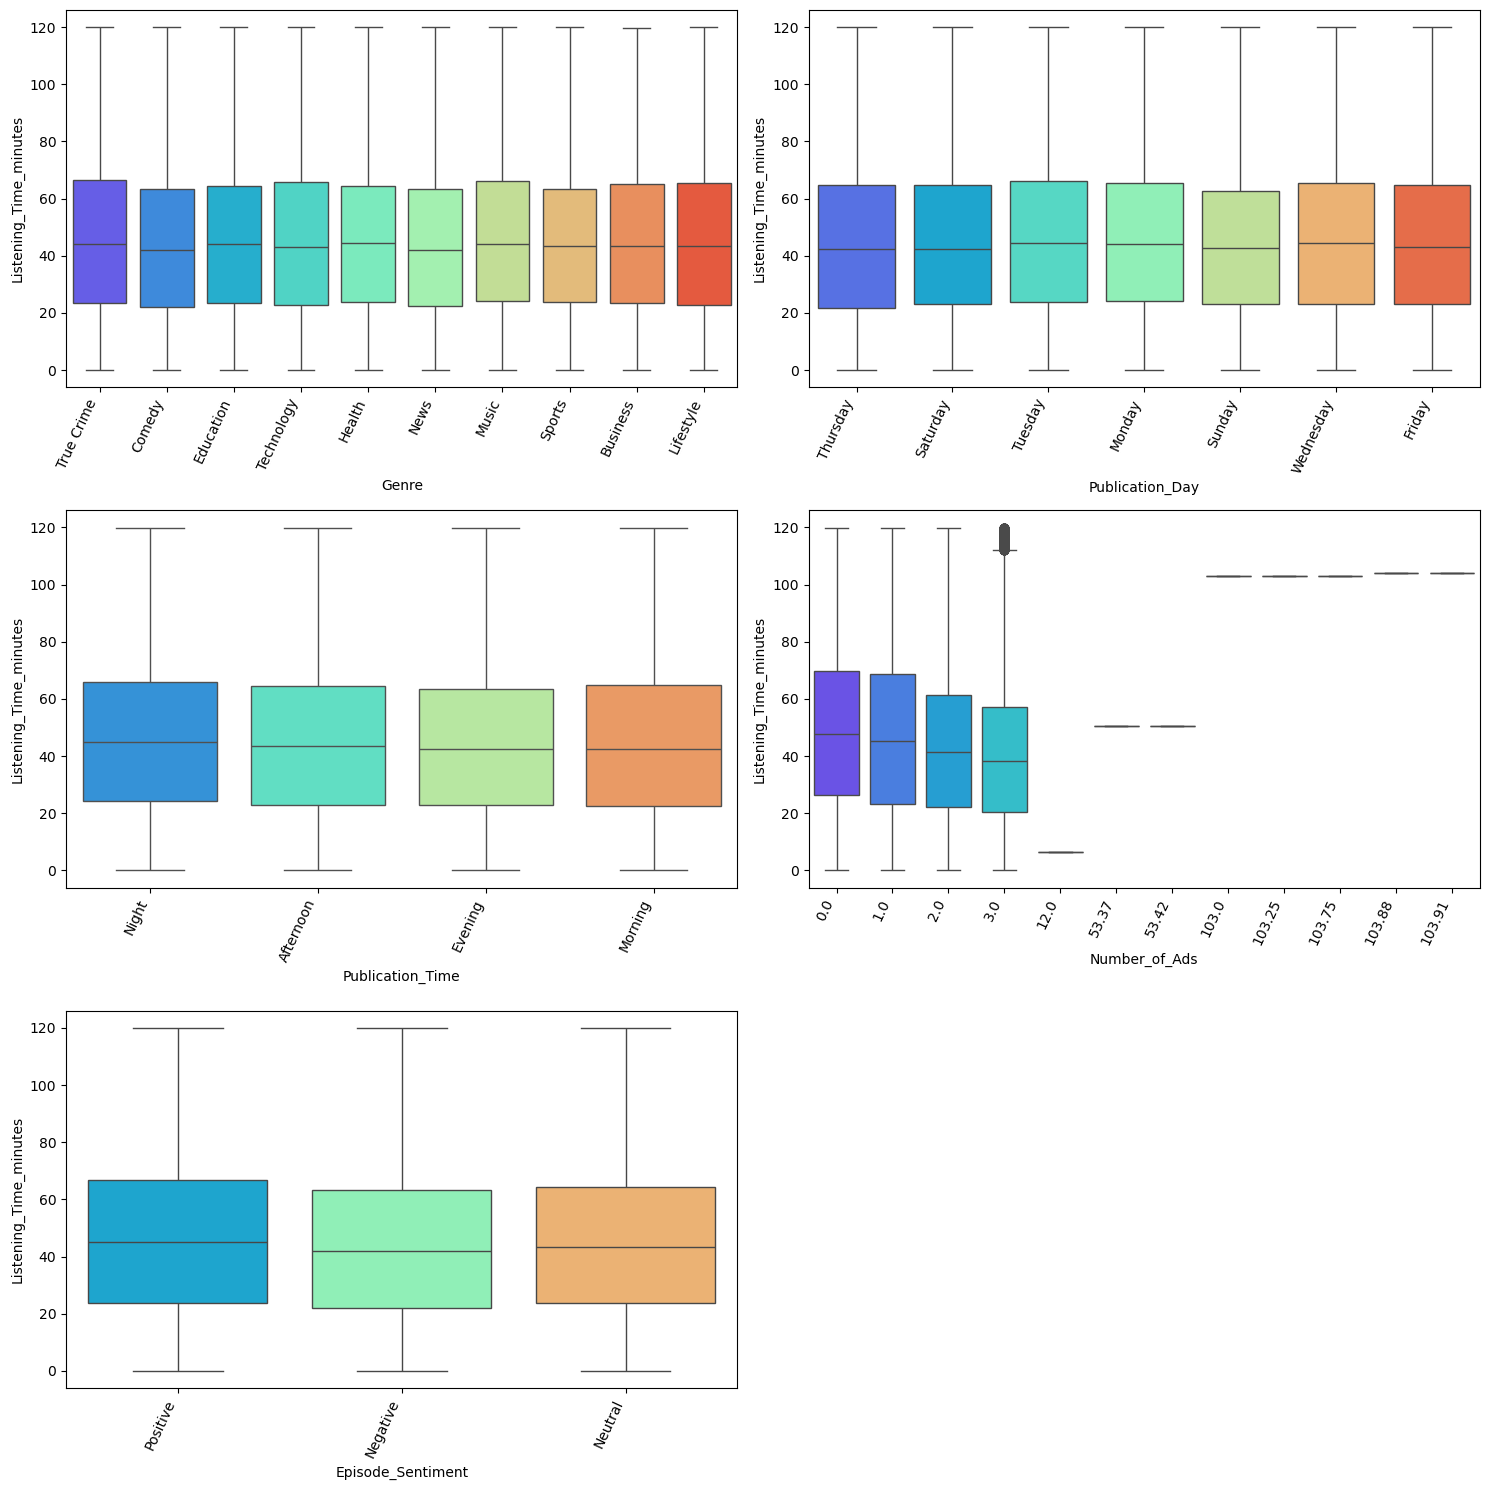

In [47]:

new_cat_cols = ['Genre', 'Publication_Day', 'Publication_Time','Number_of_Ads', 'Episode_Sentiment']
t = 1
plt.figure(figsize = (15,15))
for i in new_cat_cols:
    plt.subplot(3,2,t)
    plt.xticks(rotation = 65, ha = 'right')
    sns.boxplot(data = train_data, x = i, y = 'Listening_Time_minutes', color="tomato", palette='rainbow')
    t = t+1

plt.tight_layout()
plt.show()

### OutLier Treatment

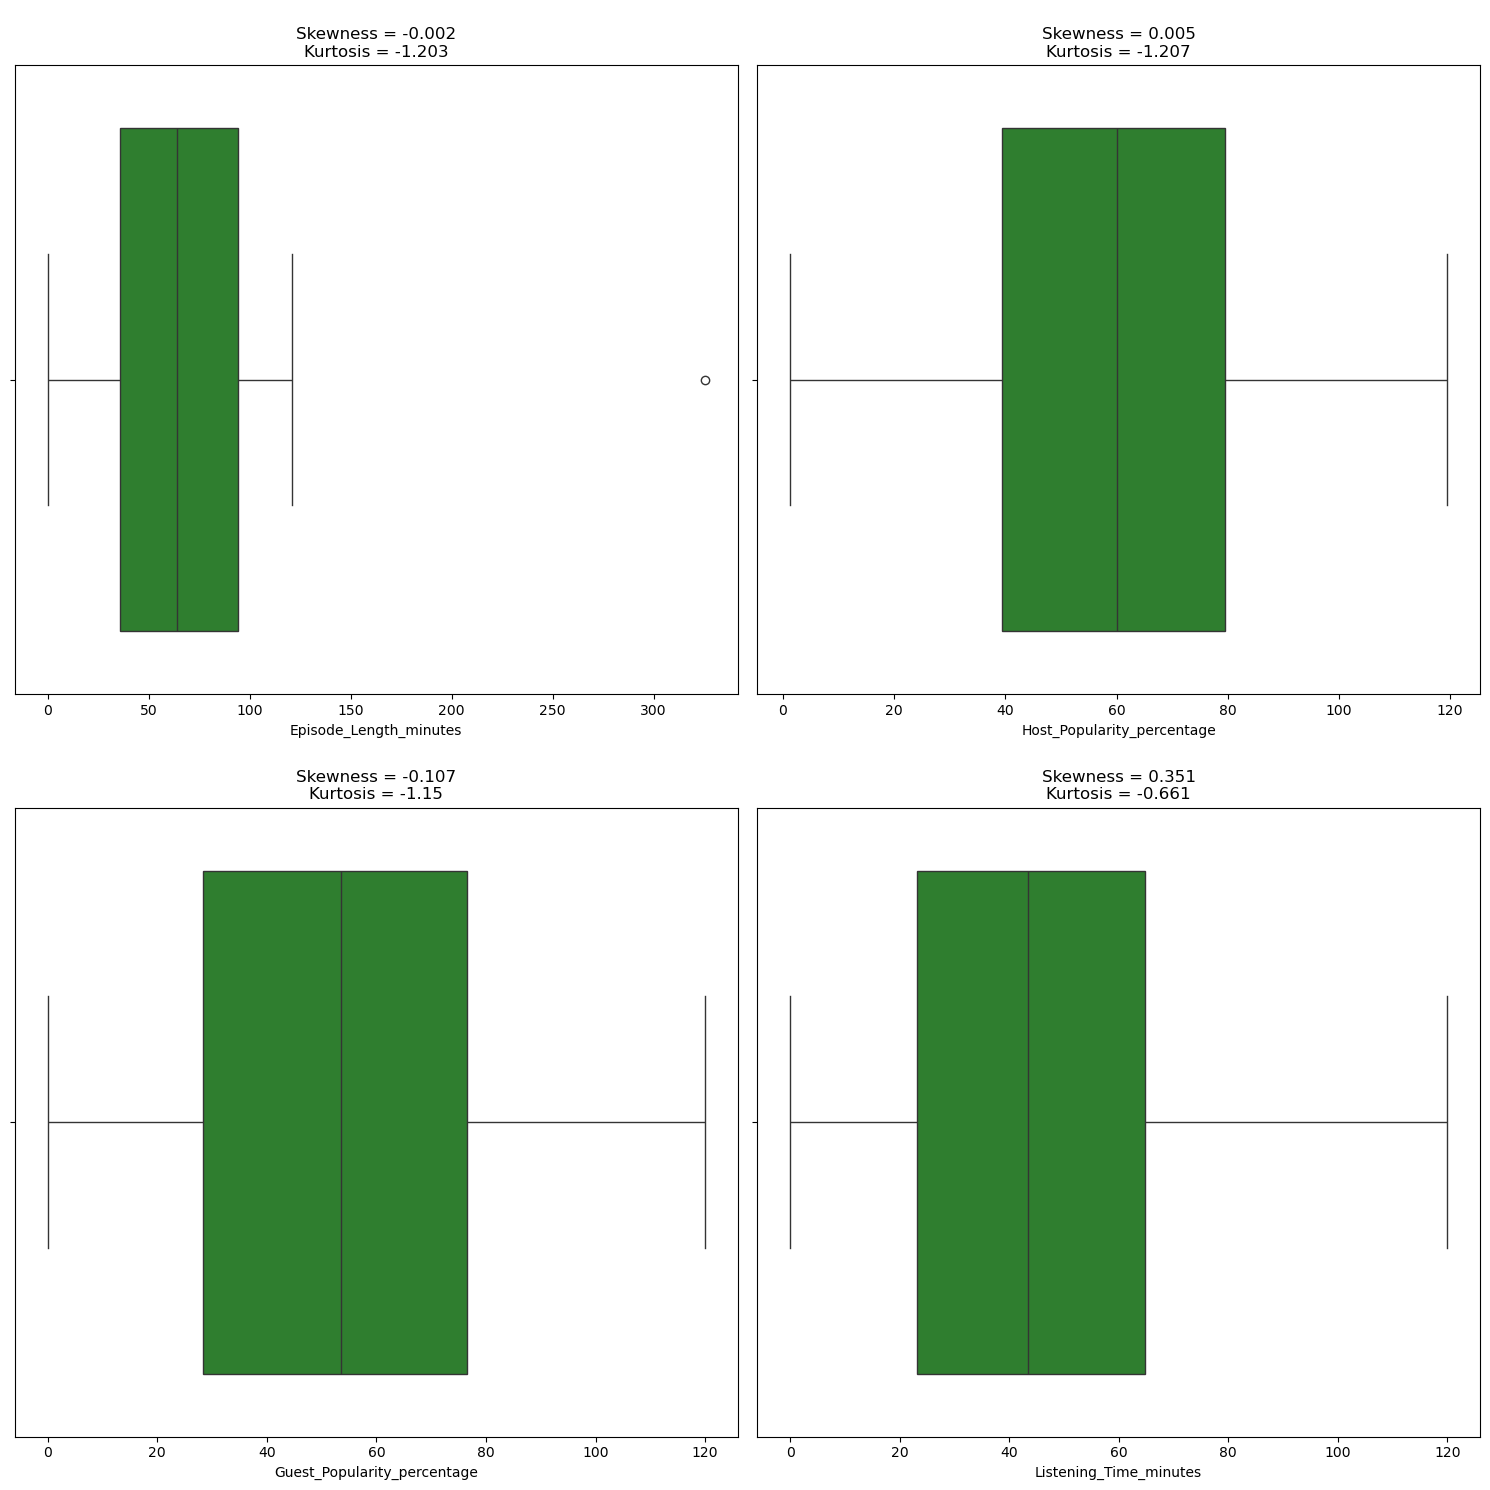

In [13]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'''
Skewness = {round(train_data[i].skew(),3)}
Kurtosis = {round(train_data[i].kurt(),3)}''')
    sns.boxplot(data = train_data, x = i, color= 'forestgreen', fill = True)
    t = t+1

plt.tight_layout()
plt.show()

Inference :
- No Outliers Detected

### **Duplicate Values**

In [14]:
train_data.duplicated().sum()

0

### Null Value Treatment

In [15]:
train_data.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

We Will Use KNNImputer for handling missing values but for that matter i will need to encode the values


In [16]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in cat_cols:
    train_data[i] = lb.fit_transform(train_data[i])

In [17]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in cat_cols:
    test_data[i] = lb.fit_transform(test_data[i])

In [18]:
train_data.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,34,98,NaN,9,74.81,4,3,NaN,0,2,31.41998
1,24,19,119.80,1,66.95,2,0,75.95,2,0,88.01241
2,40,8,73.90,2,69.97,5,1,8.97,0,0,44.92531
3,10,40,67.17,8,57.22,1,2,78.70,2,2,46.27824
4,31,85,110.51,3,80.07,1,0,58.68,3,1,75.61031


In [19]:
from sklearn.impute import SimpleImputer

In [20]:
si = SimpleImputer()

train_data['Episode_Length_minutes'] = si.fit_transform(train_data[['Episode_Length_minutes']])

train_data['Guest_Popularity_percentage'] = si.fit_transform(train_data[['Guest_Popularity_percentage']])

train_data['Number_of_Ads'] = si.fit_transform(train_data[['Number_of_Ads']] )


In [21]:
train_data.isnull().sum().sum()

0

### **Statistical Hypothesis Testing**

In [22]:
from scipy import stats

#### **T-Test On Numerical Columns**

In [27]:
Ho = 'There is no significant relation between the columns'
Ha = 'There is significant relation between the columns'


test_stat, pval = stats.ttest_rel(train_data['Listening_Time_minutes'], train_data['''Episode_Length_minutes'''])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between the columns


In [28]:
Ho = 'There is no significant relation between the columns'
Ha = 'There is significant relation between the columns'


test_stat, pval = stats.ttest_rel(train_data['Listening_Time_minutes'], train_data['''Guest_Popularity_percentage'''])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)

P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between the columns


In [29]:
Ho = 'There is no significant relation between the columns'
Ha = 'There is significant relation between the columns'


test_stat, pval = stats.ttest_rel(train_data['Listening_Time_minutes'], train_data['''Host_Popularity_percentage'''])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)

P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between the columns


#### **ANOVA Test for Checking relevancy in Target Column and Others**

In [31]:
for i in cat_cols:
    Ho = f'There is no significant relation between Listening Time and {i} columns'
    Ha = f'There is significant relation between listening Time and {i} columns'

    magics = [train_data['''Listening_Time_minutes'''][train_data[i] == j] for j in train_data[i].unique()]


    test_stat, pval = stats.f_oneway(*magics)

    print(f'P Value = {pval}')

    if pval >= 0.5:
        print('We fail to reject the Null Hypo')
        print('So,')
        print(Ho)

    else:
        print('We reject the Null Hypo')
        print('So,')
        print(Ha)


P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between listening Time and Podcast_Name columns
P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between listening Time and Episode_Title columns
P Value = 1.4679472063789464e-82
We reject the Null Hypo
So,
There is significant relation between listening Time and Genre columns
P Value = 1.2702000475390229e-49
We reject the Null Hypo
So,
There is significant relation between listening Time and Publication_Day columns
P Value = 2.479230139152791e-98
We reject the Null Hypo
So,
There is significant relation between listening Time and Publication_Time columns
P Value = 0.0
We reject the Null Hypo
So,
There is significant relation between listening Time and Number_of_Ads columns
P Value = 5.000200148983822e-255
We reject the Null Hypo
So,
There is significant relation between listening Time and Episode_Sentiment columns


### **Machine Learning Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, BaggingRegressor, Catboost
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
X = train_data.drop(columns='Listening_Time_minutes')
y = train_data['Listening_Time_minutes']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=3)

print(f'''The Size of X_Train is {x_train.shape}
The Size of X_Val is {x_val.shape}
The Size of Y_Train is {y_train.shape}
The Size of Y_Val is {y_val.shape}''')

The Size of X_Train is (600000, 10)
The Size of X_Val is (150000, 10)
The Size of Y_Train is (600000,)
The Size of Y_Val is (150000,)


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

In [70]:



def model(model, xtr,ytr,xval,yval):
    mod = model
    mod.fit(xtr,ytr)
    pred = mod.predict(xval)

    print(f'Root Mean Squared error : {np.sqrt(mean_squared_error(yval, pred))}')






In [71]:
model(LinearRegression(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 13.376043024014955


In [72]:
model(KNeighborsRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 14.480291955117877


In [73]:
model(DecisionTreeRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 18.045459863166556


In [74]:
model(RandomForestRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 12.726672378404858


In [75]:
model(GradientBoostingRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 13.187374286824134


In [76]:
model(XGBRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared error : 13.035576325772205


In [77]:
model(CatBoostRegressor(), x_train, y_train, x_val, y_val)

Learning rate set to 0.112494
0:	learn: 24.9549339	total: 189ms	remaining: 3m 8s
1:	learn: 23.0610120	total: 269ms	remaining: 2m 13s
2:	learn: 21.4338372	total: 354ms	remaining: 1m 57s
3:	learn: 20.0489101	total: 486ms	remaining: 2m
4:	learn: 18.8810811	total: 599ms	remaining: 1m 59s
5:	learn: 17.8962741	total: 686ms	remaining: 1m 53s
6:	learn: 17.0728855	total: 794ms	remaining: 1m 52s
7:	learn: 16.3879474	total: 888ms	remaining: 1m 50s
8:	learn: 15.8137612	total: 961ms	remaining: 1m 45s
9:	learn: 15.3433355	total: 1.03s	remaining: 1m 42s
10:	learn: 14.9493388	total: 1.1s	remaining: 1m 38s
11:	learn: 14.6318948	total: 1.17s	remaining: 1m 35s
12:	learn: 14.3694768	total: 1.23s	remaining: 1m 33s
13:	learn: 14.1611304	total: 1.31s	remaining: 1m 32s
14:	learn: 13.9862163	total: 1.39s	remaining: 1m 31s
15:	learn: 13.8440558	total: 1.45s	remaining: 1m 29s
16:	learn: 13.7305784	total: 1.51s	remaining: 1m 27s
17:	learn: 13.6377571	total: 1.58s	remaining: 1m 26s
18:	learn: 13.5610499	total: 1.6

In [78]:
model(LGBMRegressor(), x_train, y_train, x_val, y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.438257
Root Mean Squared error : 13.109494898813084


In [87]:
model(LGBMRegressor(n_estimators=1000, learning_rate=0.1, min_child_weight=0.0001), x_train, y_train, x_val, y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.438257
Root Mean Squared error : 12.971681275210768


In [80]:
model(DecisionTreeRegressor(criterion='poisson',random_state=2), x_train, y_train, x_val, y_val)


Root Mean Squared error : 18.094920401764366


In [98]:
xgb_params = {
    'n_estimators': 400,
    'max_depth': 14,
    'learning_rate': 0.0345,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'tree_method': 'hist',
    'n_jobs': -1}


model(XGBRegressor(**xgb_params), x_train, y_train, x_val, y_val)

Root Mean Squared error : 12.679448657289365


In [100]:
final_model = XGBRegressor(**xgb_params)
final_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0345, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=14, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [101]:
final_pred = final_model.predict(test_data)

In [102]:
samp = pd.read_csv('sample_submission.csv')
samp

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437
...,...,...
249995,999995,45.437
249996,999996,45.437
249997,999997,45.437
249998,999998,45.437


In [103]:
samp['Listening_Time_minutes'] = final_pred
samp

,id,Listening_Time_minutes
0,750000,53.131062
1,750001,20.143656
2,750002,47.842674
3,750003,76.216652
4,750004,46.128372
...,...,...
249995,999995,12.290631
249996,999996,61.911015
249997,999997,8.818301
249998,999998,78.506744


In [104]:
samp.to_csv('my_submission.csv', index=False)